In [109]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum
import multiprocessing
import pandas as pd
from functools import partial
import numpy as np
import random
import glob
import re
import csv
import os
import seaborn as sns
import pandas as pd
from tqdm import tqdm

plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 10

#Description

This file contains the emission-line fits from specBS. A best-fit stellar absorption-line template has been subtracted.
```
The columns in the first HDU
Column	Description
PLATE	Plate number
MJD	Modified Julian date of observation
FIBERID	Fiber ID (1 to 640)
LINENAME	Line name
LINEWAVE	Catalog wavelength for this line in vacuum Angstroms
LINEZ	Redshift
LINEZ_ERR	Redshift error (negative for invalid fit)
LINESIGMA	Gaussian width in km/sec
LINESIGMA_ERR	Error in gaussian width (negative for invalid fit)
*LINEAREA	Area in gaussian fit where units are (flux-units) * Ang
LINEAREA_ERR	Flux error (negative for invalid fit)
*LINEEW	Equivalent width (Angstroms)
LINEEW_ERR	Equivalent width error (negative for invalid fit)
*LINECONTLEVEL	Continuum level at line center
LINECONTLEVEL_ERR	Error in continuum level at line center
LINENPIX	Number of good pixels within +/- 3 sigma of the line center
LINEDOF	Degrees of freedom in fit, approximated as LINENPIX minus the number of terms fit for that line, which can be fractional if one parameter if fixed betwen several lines
LINECHI2	χ2 for all points within +/- 3 sigma of the line center (negative if no such points)
```

In [47]:
# collect files
sy19 = glob.glob('./DR16/sy19/*.fits')
galaxy = glob.glob('./DR16/galaxy/*.fits')
sy20 = glob.glob('./DR16/sy20/*.fits')

type1 = sy19 + galaxy
type2 = random.sample(sy20,len(type1))

print('each sample number:', len(type1))

each sample number: 3667


In [80]:
linesTotal = []
Has = []
Hbs = []
for file in tqdm(sy19):
    obj=fits.open(file[:100])    
    data = Table.read(obj, hdu=1).to_pandas()
    z = Table.read(obj,hdu=2)['Z'].item()
    zErr = Table.read(obj,hdu=2)['Z_ERR'].item()
    lines = Table.read(obj, hdu=3).to_pandas()
    Hbs.append(lines['LINEEW'][15])
    Has.append(lines['LINEEW'][24])
    .drop(columns='LINENAME')
    if (len(linesTotal) == 0):
        linesTotal = lines
        lineName = Table.read(obj, hdu=3).to_pandas()['LINENAME']
        continue
    linesTotal = linesTotal + lines

linesMean = linesTotal/(len(sy19))

100%|██████████| 745/745 [02:03<00:00,  6.11it/s]


In [100]:
obj=fits.open(sy19[56])    
data = Table.read(obj, hdu=1).to_pandas()
z = Table.read(obj,hdu=2)['Z'].item()
zErr = Table.read(obj,hdu=2)['Z_ERR'].item()

lines = Table.read(obj, hdu=3).to_pandas()
lineName = lines['LINENAME']

In [102]:
lines

,PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
0,654,52146,288,Ly_alpha,1215.670000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
1,654,52146,288,N_V 1240,1240.810000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
2,654,52146,288,C_IV 1549,1549.480000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
3,654,52146,288,He_II 1640,1640.420000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
4,654,52146,288,C_III] 1908,1908.734000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
5,654,52146,288,Mg_II 2799,2800.315184,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0,0,0.000000,-1.000000
6,654,52146,288,[O_II] 3725,3727.091727,0.152891,0.000017,246.436005,5.133790,19.772577,9.757339,2.766426,1.277225,7.147337,0.227217,11,11,20.903891,25.881851
7,654,52146,288,[O_II] 3727,3729.875448,0.152891,0.000017,246.436005,5.133790,64.361374,9.600182,9.192909,1.076984,7.001197,0.224086,10,11,19.903891,21.562696
8,654,52146,288,[Ne_III] 3868,3869.856797,0.152891,0.000017,246.436005,5.133790,29.981268,5.345578,3.342192,0.519349,8.970540,0.205474,10,11,19.903891,38.067863
9,654,52146,288,H_epsilon,3890.151080,0.152891,0.000017,213.897064,7.536042,-20.784204,4.733193,-2.295414,0.572006,9.054665,0.194356,9,9,16.706522,8.604017


In [89]:
linesMean.insert(3, "LINENAME",lineName, True) 

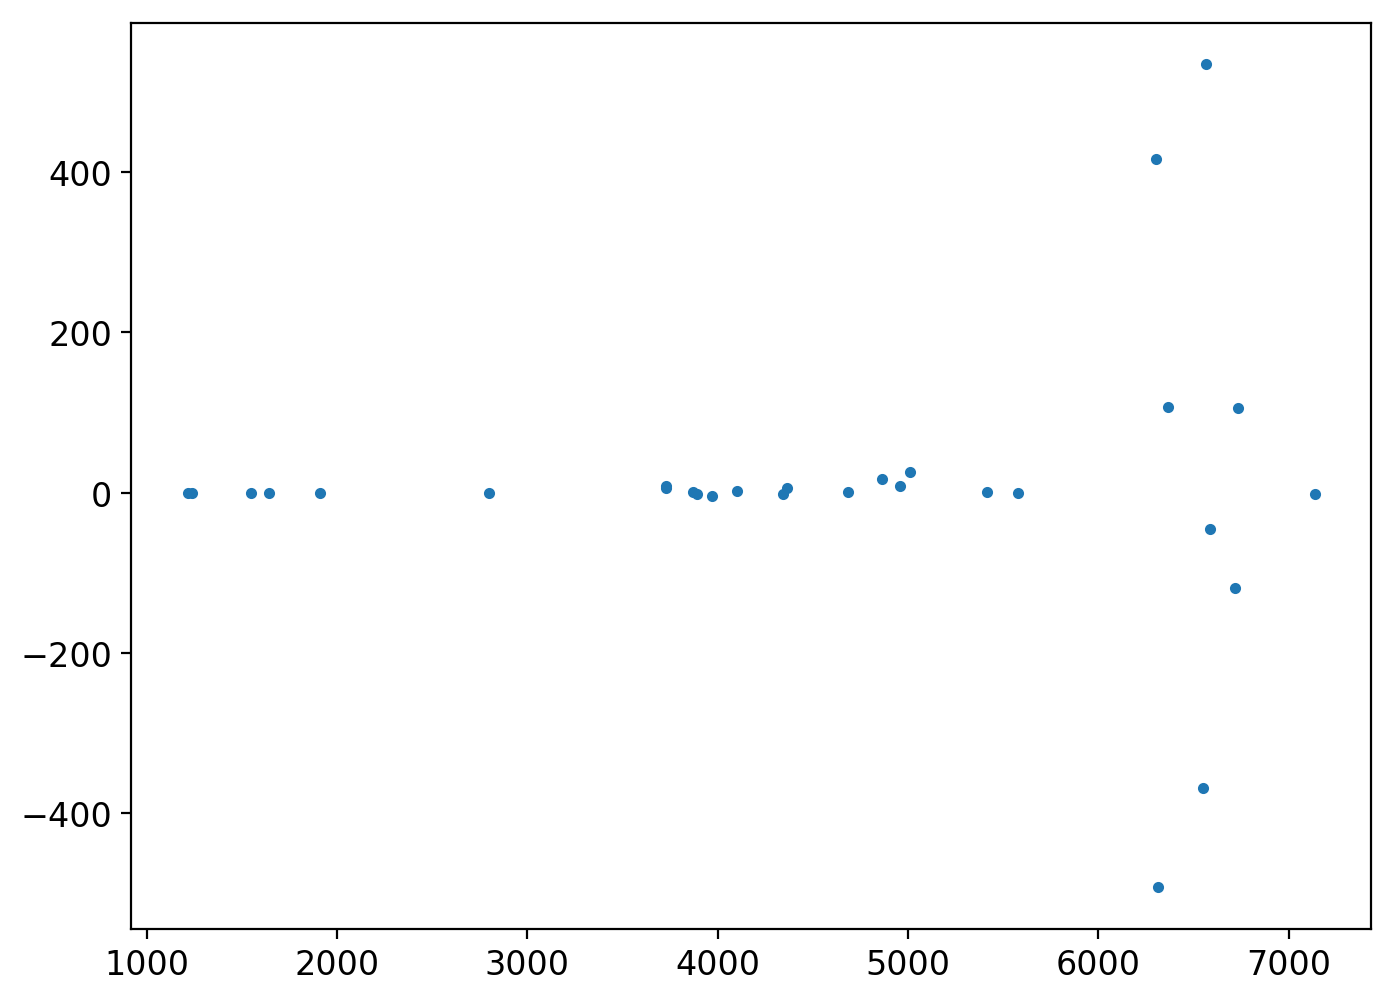

In [90]:
plt.plot(linesMean['LINEWAVE'], linesMean['LINEEW'],'.')

In [91]:
linesMean

,PLATE,MJD,LINENAME,FIBERID,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
0,1386.555705,52993.32349,Ly_alpha,322.202685,1215.670000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
1,1386.555705,52993.32349,N_V 1240,322.202685,1240.810000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
2,1386.555705,52993.32349,C_IV 1549,322.202685,1549.480000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
3,1386.555705,52993.32349,He_II 1640,322.202685,1640.420000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
4,1386.555705,52993.32349,C_III] 1908,322.202685,1908.734000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
5,1386.555705,52993.32349,Mg_II 2799,322.202685,2800.315184,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
6,1386.555705,52993.32349,[O_II] 3725,322.202685,3727.091727,0.132296,0.000074,720.692139,18.142933,99.353882,184.617599,6.172490,11.064086,14.437714,0.147939,29.154362,31.069799,59.133724,223.271912
7,1386.555705,52993.32349,[O_II] 3727,322.202685,3729.875448,0.132296,0.000074,720.692139,18.142933,86.086021,183.839447,7.903270,10.670982,14.426549,0.146875,29.273826,31.025503,59.208893,223.725769
8,1386.555705,52993.32349,[Ne_III] 3868,322.202685,3869.856797,0.132296,0.000074,720.692139,18.142933,14.792475,16.812197,0.632395,1.226226,15.281313,0.115763,30.692617,31.222819,60.820553,139.236588
9,1386.555705,52993.32349,H_epsilon,322.202685,3890.151080,0.132296,0.000074,1428.227051,35.653690,-12.129207,17.508141,-1.499395,1.437818,15.448113,0.111682,61.689933,61.873826,122.271248,303.107330


In [87]:
sy19[99]

'./DR16/sy19/spec-1587-52964-0080.fits'

In [145]:
Has = []
Hbs = []
for file in sy19:
    obj=fits.open(file[:100])    
    data = Table.read(obj, hdu=1).to_pandas()
    lines = Table.read(obj, hdu=3).to_pandas()
    Hbs.append(lines['LINEEW'][15])
    Has.append(lines['LINEEW'][24])

Hbs = np.asarray(Hbs)
Has = np.asarray(Has)

In [111]:
Hbs.append(lines['LINEEW'][15])

(array([ 6., 21., 21., 31., 26., 25., 17., 12., 14., 21., 20., 18., 12.,
        27., 12., 19., 22., 26., 20., 19., 19., 17., 18., 21., 19., 20.,
        17., 15., 12., 11., 16., 12.,  7.,  8., 11.,  7.,  9., 10.,  7.,
         7.,  7.,  3.,  6.,  7.,  4.,  5.,  5.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  4.,  2.,  3.,  1.,  4.,  2.,  3.,  1.,  1.,  1.,  2.,
         2.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.5170734 ,  0.29242313,  1.1019197 ,  1.9114162 ,  2.7209127 ,
         3.5304093 ,  4.3399057 ,  5.149402  ,  5.958899  ,  6.7683954 ,
         7.577892  ,  8.387388  ,  9.196885  , 10.006381  , 10.815878  ,
        11.625375  , 12.434871  , 13.244368  , 14.0538645 , 14.86336   ,
        15.672857  , 16.482353  , 17.291851  , 18.101347  , 18.910843  ,
        19.720339  , 20.529837  , 21.339333  , 22.148829  , 22.958326

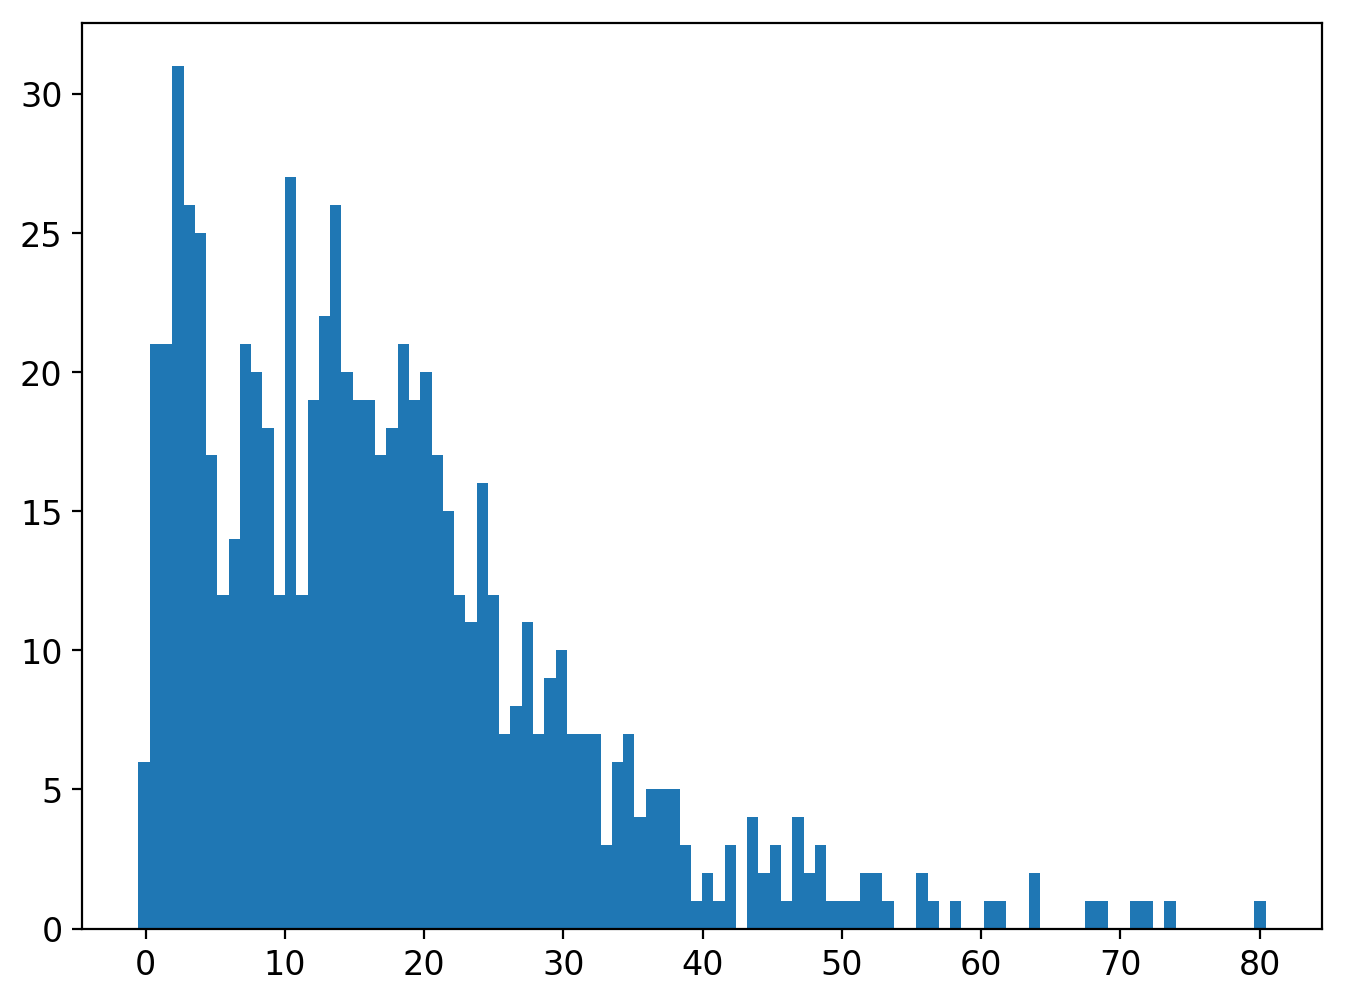

In [114]:
plt.hist(Hbs,100)

(array([46., 74., 31., 17., 21., 25., 45., 42., 38., 48., 33., 20., 15.,
        18., 15., 11.,  9., 13.,  8.,  9.,  7.,  6.,  7.,  8.,  7.,  3.,
         0.,  3.,  3.,  2.,  2.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  2.,
         1.,  0.,  2.,  2.,  0.,  3.,  1.,  2.,  0.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 <a list of 50 Patch objects>)

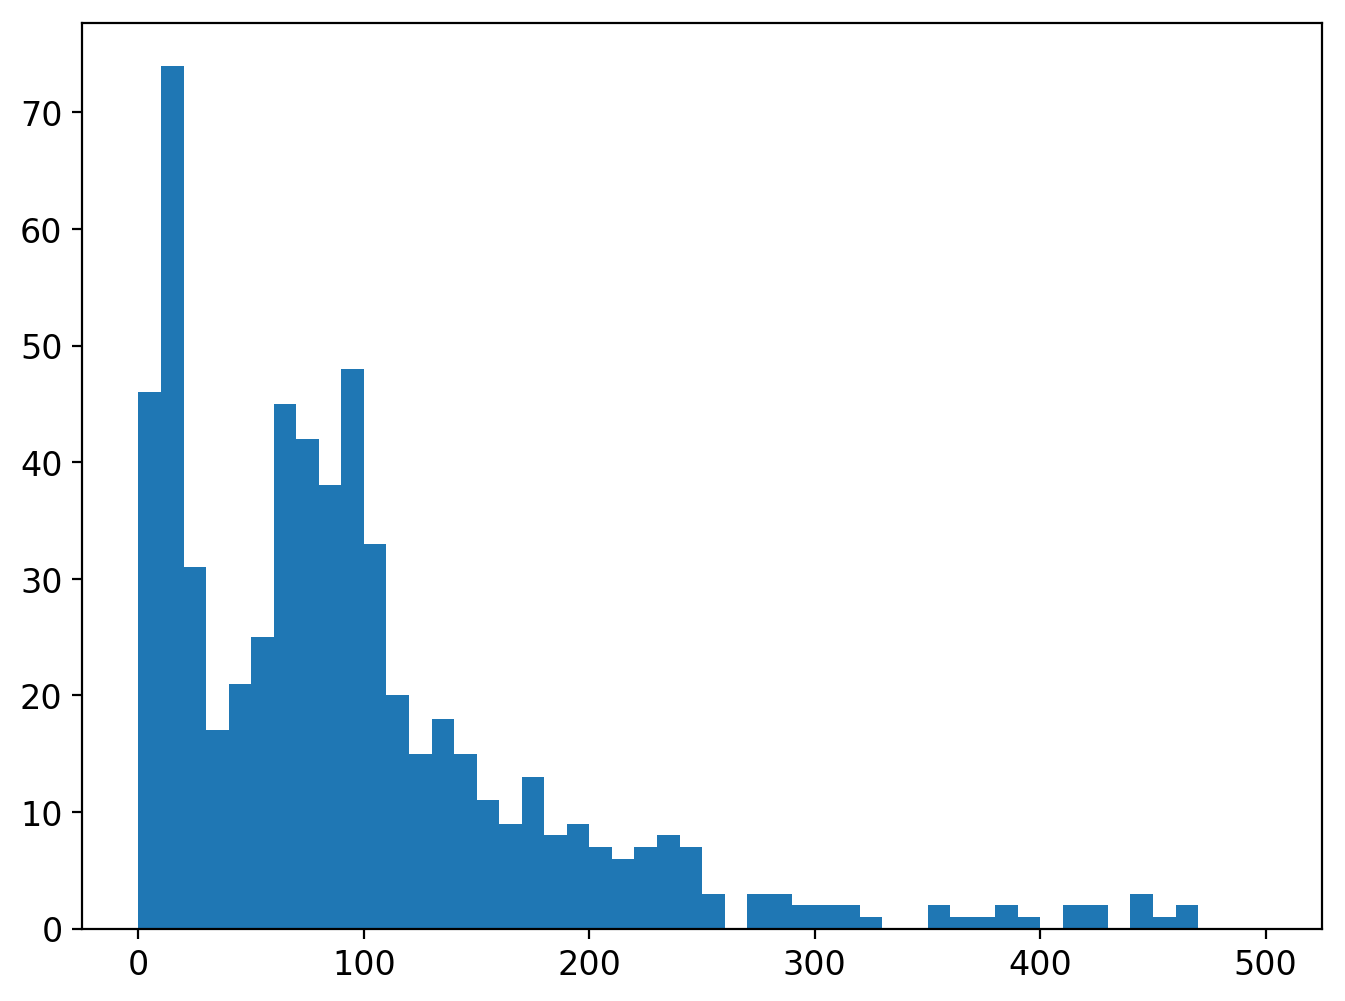

In [128]:
plt.hist(Has,np.linspace(0,500,51))

(-100, 500)

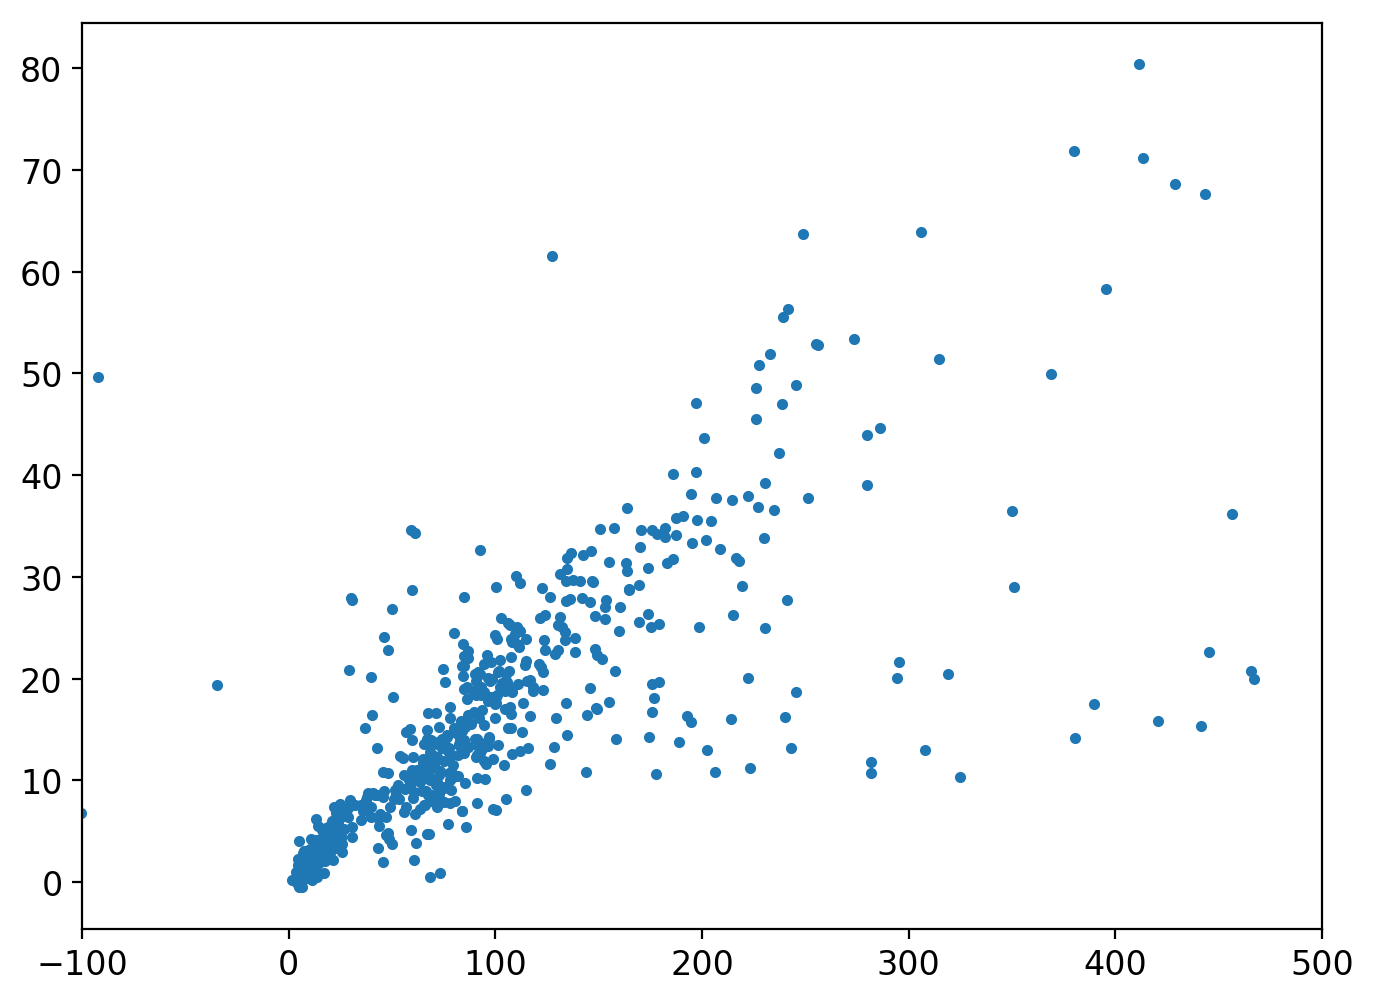

In [121]:
plt.plot(Has,Hbs,'.')
plt.xlim(-100,500)

In [152]:
len(Has[Has<240])/len(Has)

0.8067114093959732

In [148]:
len(Hbs[Hbs<30])/len(Hbs)

0.8536912751677852